In [2]:
%pip install tweepy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 94 kB 1.2 MB/s eta 0:00:01
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.1-py3-none-any.whl (151 kB)
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
     |████████████████████████████████| 161 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 781 kB/s  eta 0:00:01
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import re 
import tweepy 
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tweepy import OAuthHandler 
from textblob import TextBlob
import os

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\coleb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\coleb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
import tweepy
import os
APIK = os.environ.get('APIK')
APISK = os.environ.get('APISK')
ACCTO = os.environ.get('ACCTO')
ACCTOS = os.environ.get('ACCTOS')
auth = tweepy.OAuthHandler(APIK, APISK) #Set up the app keys
auth.set_access_token(ACCTO,
                      ACCTOS) #set up your user tokens
api = tweepy.API(auth, wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)


In [3]:
def connect():
  # Replace the xxxxx with your twitter api keys
  consumer_key = 'APIK'
  consumer_secret = 'APISK'
  access_token = 'ACCTO'
  access_token_secret = 'ACCTOS'

  try:
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    return api
  except:
    print("Error")
    exit(1)

### Tweepy API User Info

In [4]:
api = tweepy.API(auth)

In [5]:
me = api.verify_credentials()

In [6]:
me.name

'Cole'

In [7]:
print(f'I have {me.followers_count} follower.')
print(f'I am following {me.friends_count} users.')

I have 21 follower.
I am following 164 users.


### Rate Limits

In [8]:
api.rate_limit_status()

{'rate_limit_context': {'access_token': '2777419660-hIblVunw1TwIbGqiNE9HWcogMx3OaxTtRe0YxJN'},
 'resources': {'lists': {'/lists/list': {'limit': 15,
    'remaining': 15,
    'reset': 1665909390},
   '/lists/:id/tweets&GET': {'limit': 900,
    'remaining': 900,
    'reset': 1665909390},
   '/lists/:id/followers&GET': {'limit': 180,
    'remaining': 180,
    'reset': 1665909390},
   '/lists/memberships': {'limit': 75, 'remaining': 75, 'reset': 1665909390},
   '/lists/:id&DELETE': {'limit': 300, 'remaining': 300, 'reset': 1665909390},
   '/lists/subscriptions': {'limit': 15, 'remaining': 15, 'reset': 1665909390},
   '/lists/members': {'limit': 900, 'remaining': 900, 'reset': 1665909390},
   '/lists/:id&GET': {'limit': 75, 'remaining': 75, 'reset': 1665909390},
   '/lists/subscribers/show': {'limit': 15,
    'remaining': 15,
    'reset': 1665909390},
   '/lists/:id&PUT': {'limit': 300, 'remaining': 300, 'reset': 1665909390},
   '/lists/show': {'limit': 75, 'remaining': 75, 'reset': 1665909

In [9]:
print(api.rate_limit_status()['resources']['followers']['/followers/ids'])

{'limit': 15, 'remaining': 15, 'reset': 1665909390}


In [10]:
print(api.rate_limit_status()['resources']['users']['/users/lookup'])

{'limit': 900, 'remaining': 900, 'reset': 1665909390}


In [11]:
cbhami02=api.get_user(screen_name='cbhami02')

### Search Tweets by Topic

In [12]:
def print_tweets(tweets):
    """For each Tweepy Status object in tweets, display the 
    user's screen_name and tweet text. If the language is not
    English, translate the text with TextBlob."""
    for tweet in tweets:
        print(f'{tweet.user.screen_name}:', end=' ')
    
        if 'en' in tweet.lang:
            print(f'{tweet.text}\n')
        elif 'und' not in tweet.lang:  # translate to English first
            print(f'\n  ORIGINAL: {tweet.text}')
            try:
                print(f'TRANSLATED: {TextBlob(tweet.text).translate()}\n')
            except:
                print('Unable to translate tweet')

In [13]:
tweets = api.search(q='Roe', count=100)

In [14]:
print_tweets(tweets) 

CarolAnnPrince: RT @mmpadellan: FRIENDS: Please do me a huge favor: RT this and follow us at @ReallyAmerican1: we have LOADS in store to expand our House &amp;…

JJaazzee1: RT @Bish_Resists: 23 days...

Are you still pissed about #Roe? Me too. Let's show 'em girls. 

#RoevemberIsComing 
#StayPissed
#VoteBlueFor…

bahiawilson: RT @TomthunkitsMind: If we lose Congress, Biden becomes a lame duck &amp; will be impeached immediately. Overturning Roe is just the beginning.…

lmganda1: RT @Amy_Siskind: Midterms are 24 days away. We ALL need to pitch in for the final days &amp; not be apathetic or complacent. If Roe being overt…

62WalterP: RT @Bish_Resists: 23 days...

Are you still pissed about #Roe? Me too. Let's show 'em girls. 

#RoevemberIsComing 
#StayPissed
#VoteBlueFor…

LolaDeLaWinter: RT @Bish_Resists: 23 days...

Are you still pissed about #Roe? Me too. Let's show 'em girls. 

#RoevemberIsComing 
#StayPissed
#VoteBlueFor…

soozer52: RT @__Phoenyx__: @byKateSmith @fsubsms 2/  As wit

In [15]:
tweets = api.search(q='Roe :)', count=3) #Only "positive sentiment tweets involving Roe"

In [16]:
print_tweets(tweets)

dorotininiw: @roexvg morning po! u too, roe :)

FrancaRose33: @alexruthrauff @cobracommandr15 Hmmm … I think Dem positions (the real ones, not the BS they pretend we have!) are… https://t.co/UBIJ3gP0Rq

austin_roe: Nothing makes me happier than this :) https://t.co/bO5CObQhEN



### Trends Available

In [17]:
trends_available = api.trends_available()

In [18]:
len(trends_available)

467

In [19]:
trends_available[0]

{'name': 'Worldwide',
 'placeType': {'code': 19, 'name': 'Supername'},
 'url': 'http://where.yahooapis.com/v1/place/1',
 'parentid': 0,
 'country': '',
 'woeid': 1,
 'countryCode': None}

In [20]:
world_trends_comp = api.trends_place(id=1)  # Worldwide trending topics (list containing one dictionary)

In [21]:
world_trends_comp = api.trends_place(id=1)  # Worldwide trending topics (list containing one dictionary)

In [22]:
world_trends = world_trends_comp[0]['trends'] # The 'trends' key is tied to the info about the actual trending topics

In [23]:
world_trends[4]

{'name': 'スタニングローズ',
 'url': 'http://twitter.com/search?q=%E3%82%B9%E3%82%BF%E3%83%8B%E3%83%B3%E3%82%B0%E3%83%AD%E3%83%BC%E3%82%BA',
 'promoted_content': None,
 'query': '%E3%82%B9%E3%82%BF%E3%83%8B%E3%83%B3%E3%82%B0%E3%83%AD%E3%83%BC%E3%82%BA',
 'tweet_volume': 53558}

In [24]:
world_trends_baseline = [t for t in world_trends if t['tweet_volume']]
world_trends_high_volume = [t for t in world_trends if (t['tweet_volume']) and(t['tweet_volume']>100000)]
print(f'Total world trends: {len(world_trends)}') #Remember that the cap of returned trends is 50!
print(f'Total world trends >10k volume: {len(world_trends_baseline)}')
print(f'Total world trends >100k volume: {len(world_trends_high_volume)}')


Total world trends: 50
Total world trends >10k volume: 28
Total world trends >100k volume: 3


In [25]:
world_trends_comp = api.trends_place(id=1)  # Worldwide trending topics (list containing one dictionary)

### World_Trends

In [26]:
from operator import itemgetter 

In [27]:
World_trends_w_volume = [t for t in world_trends if (t['tweet_volume'])]
print(f'Total World trends >15k volume: {len(World_trends_w_volume)}')


Total World trends >15k volume: 28


In [28]:
world_trends_baseline.sort(key=itemgetter('tweet_volume'), reverse=True) #sort world trends by descending volume

In [29]:
for trend in world_trends_baseline[:10]: #Display the top 5 topics by volume
    print(trend['name'])

Padres
Dodgers
#水星の魔女
当選可能
Wilder
スターズオンアース
#秋華賞
Asia Cup
サッカー
スタニングローズ


In [30]:
WW_topics = {}  # dictionary to store trend names and volumes for topics in the world


In [31]:
for trend in world_trends_baseline:
    WW_topics[trend['name']] = trend['tweet_volume']

In [32]:
print(WW_topics)

{'Padres': 179353, 'Dodgers': 176585, '#水星の魔女': 151331, '当選可能': 85919, 'Wilder': 84526, 'スターズオンアース': 66647, '#秋華賞': 64406, 'Asia Cup': 62643, 'サッカー': 56245, 'スタニングローズ': 53558, '#天皇杯': 46748, 'Sri Lanka': 41953, 'ナミュール': 41788, 'ANNYEONG BIBLEBUILD': 41620, '最大1万円': 37874, 'San Diego': 31939, 'サウンドビバーチェ': 25774, 'Namibia': 24231, '#荒野巨人コンサート': 23970, '記念うちわ': 21652, '当選番号': 20961, 'うちわ番号': 19437, 'コラボ金枠スキン': 19381, 'BELLEleam WITH MET TATHIONE': 18407, 'アートハウス': 15917, 'Dave Roberts': 15825, '坂井瑠星': 12641, '坂井騎手': 12215}


In [33]:
import pandas as pd

WWdf = pd.DataFrame(WW_topics, index = [0]) 

<AxesSubplot:title={'center':'Twitter Trends in the World'}, xlabel='Trends', ylabel='Count'>

c:\Users\coleb\mambaforge\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\coleb\mambaforge\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26143 (\N{CJK UNIFIED IDEOGRAPH-661F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\coleb\mambaforge\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\coleb\mambaforge\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39764 (\N{CJK UNIFIED IDEOGRAPH-9B54}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\coleb\mambaforge\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from current font.
  fig.canvas.print_figure(bytes_io,

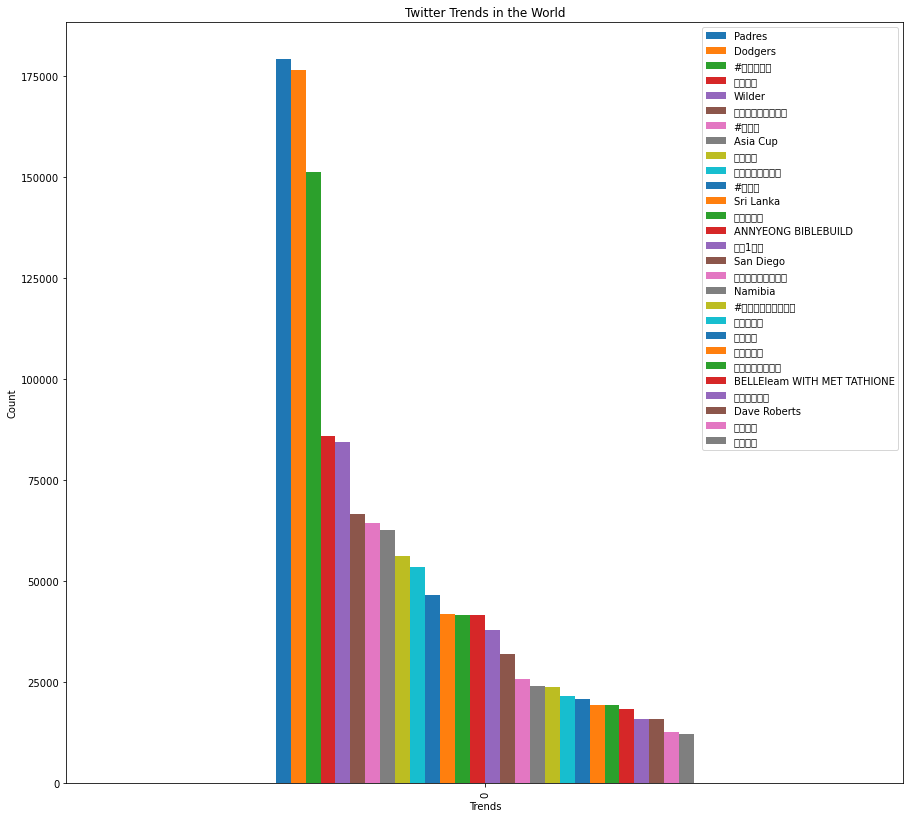

In [34]:
#Plot Descending
WWdf.plot(kind="bar",
 figsize=(15, 14),
  xlabel="Trends",
   ylabel="Count",
    title="Twitter Trends in the World")

In [35]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
#mask = np.array(Image.open('Texas.jpg'))

wordcloud_WW = WordCloud(width=1800, height=900,
    prefer_horizontal=0.5, min_font_size=6, colormap='prism', 
    background_color='white')

In [36]:
wordcloud_WW = wordcloud_WW.fit_words(WW_topics)

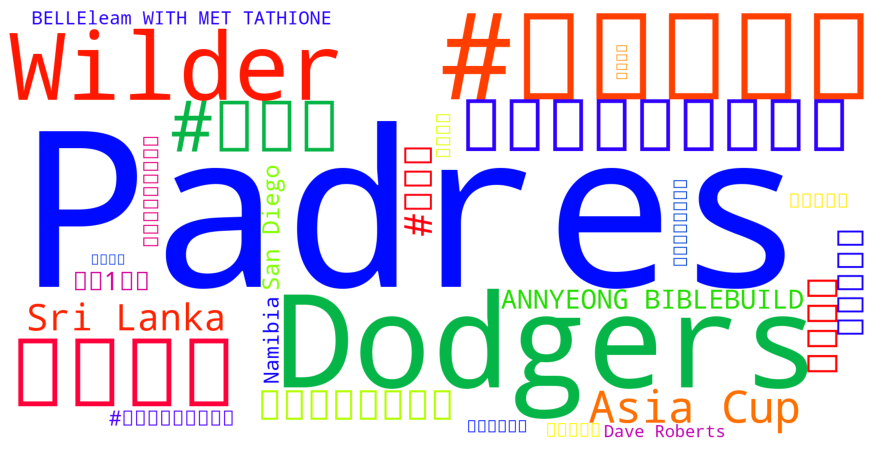

In [37]:

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
#mask = np.array(Image.open('Texas.jpg'))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud_WW)
plt.axis("off")
plt.show()

## Tweet Listener

### Load Packages

In [38]:
from tweetlistener import TweetListener
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy import API
import preprocessor as p
from prepsubjecttweets import prepsubject

### Test Tweet Listener and Clean Tweet

In [39]:
tweet_text = 'RT #NASA A sample retweet with a URL https://nasa.gov'

In [40]:
p.clean(tweet_text)

'A sample retweet with a URL'

### Tweet Listener - Load Trends

In [41]:
tweetlistraw1,tweetlistprep1 = prepsubject('Roe',150)

### Number 1 Tweet Topic

In [42]:
tweetlistraw1

['@mmpadellan Women of America. Why don’t you just refuse sex with men until Roe v Wade is national law?! That would… https://t.co/1d8jXsSVAA',
 'RT @mmpadellan: FRIENDS: Please do me a huge favor: RT this and follow us at @ReallyAmerican1: we have LOADS in store to expand our House &amp;…',
 "RT @Bish_Resists: 23 days...\n\nAre you still pissed about #Roe? Me too. Let's show 'em girls. \n\n#RoevemberIsComing \n#StayPissed\n#VoteBlueFor…",
 'RT @TomthunkitsMind: If we lose Congress, Biden becomes a lame duck &amp; will be impeached immediately. Overturning Roe is just the beginning.…',
 'RT @Amy_Siskind: Midterms are 24 days away. We ALL need to pitch in for the final days &amp; not be apathetic or complacent. If Roe being overt…',
 "RT @Bish_Resists: 23 days...\n\nAre you still pissed about #Roe? Me too. Let's show 'em girls. \n\n#RoevemberIsComing \n#StayPissed\n#VoteBlueFor…",
 "RT @Bish_Resists: 23 days...\n\nAre you still pissed about #Roe? Me too. Let's show 'em girls. \n\n#Roeve

In [43]:
tweetlistprep1

['Women of America. Why dont you just refuse sex with men until Roe v Wade is national law?! That would',
 ': FRIENDS: Please do me a huge favor: RT this and follow us at : we have LOADS in store to expand our House &amp;',
 ": days...Are you still pissed about ? Me too. Let's show 'em girls.",
 ': If we lose Congress, Biden becomes a lame duck &amp; will be impeached immediately. Overturning Roe is just the beginning.',
 ': Midterms are days away. We ALL need to pitch in for the final days &amp; not be apathetic or complacent. If Roe being overt',
 ": days...Are you still pissed about ? Me too. Let's show 'em girls.",
 ": days...Are you still pissed about ? Me too. Let's show 'em girls.",
 ": / As with Roe, they're interjecting there religious ideology into our Government. In his case, i",
 'Local roe deer just chilling in the stubble last night, taking in the view',
 ': And what theyre really counting on is that baggage fee or Jim Crow effectthat in a few years, younger generations t

In [44]:
import pandas as pd
tweetlist = pd.DataFrame(tweetlistprep1)

In [45]:
tweetlist.head()

,0
0,Women of America. Why dont you just refuse sex...
1,: FRIENDS: Please do me a huge favor: RT this ...
2,: days...Are you still pissed about ? Me too. ...
3,": If we lose Congress, Biden becomes a lame du..."
4,: Midterms are days away. We ALL need to pitch...


## Stream

### Load Packages

In [46]:
from tweepy.streaming import Stream
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob

### Sentiment Listener Topic 1

In [47]:
run sentimentlistener.py "#Roe" 100

  playgroundsgame: Sports Coaching Providers in Roe Lee | Playground Games #PPA #Sports #Coaches #Roe #Lee

  tvshows_bot: Roe Roe Roe Your Vote t-shirt #vote #roe #your #MaxwellAlxnders #EtsySeller

  schroederwrite: @TulsiGabbard @GenDonBolduc Bolduc is a danger to women everywhere. @PPFA #MeToo #Roe

  Willy_mo1959: If only there had been a way to remove #Roe from judicial purview and legislate the issue? Maybe when #Democrats he…

- DelilahJones73: @senbetsyjohnson Drop. The fuck. Out. #roe

+ alieye: Without control over our own health and reproductive choices, we have nothing. Vote! #RoevemberIsComing #Roe…

+ EvAndee4ever: #WOMEN CAN REGAIN THEIR RIGHTS and GUARANTEE #ROE v WADE IS CODIFIED by VOTING DEMOCRAT in 2022. The most wonderf…

  EvAndee4ever: @JoshShapiroPA #WOMEN CAN REGAIN THEIR RIGHTS and GUARANTEE #ROE v WADE IS CODIFIED by VOTING DEMOCRAT in 2022. T…

  EvAndee4ever: @JoshShapiroPA #WOMEN CAN REGAIN THEIR RIGHTS and GUARANTEE #ROE v WADE IS CODIFIED by VOTING DEMO

ReadTimeoutError: HTTPSConnectionPool(host='stream.twitter.com', port=443): Read timed out.

## Geocoding

In [48]:
import os
from geopy import OpenMapQuest

In [49]:
geo = OpenMapQuest(api_key=os.environ['GeoCK'])
locations = ['222 Eastern Pkwy, Louisville, KY 40208',
             '440 N Whittington Pkwy, Louisville, KY 40222']
geo_locations = []
for loc in locations:
    geo_locations.append(geo.geocode(loc))

In [50]:
geo_locations

[Location(Duthie Center for Engineering, 222, Eastern Parkway, Louisville, Jefferson County, Kentucky, 40208, United States of America, (38.21264035, -85.7608605714874, 0.0)),
 Location(Burhans Hall, 440, North Whittington Parkway, Hurstbourne, Jefferson County, Kentucky, 40222, United States of America, (38.25334785, -85.5843224594185, 0.0))]

In [51]:
from tweetutilities import get_tweepy_API

In [52]:
api = get_tweepy_API()

In [53]:
tweets = [] 
counts = {'total_tweets': 0, 'locations': 0}


### Location Listener

In [54]:
from locationlistener import LocationListener

In [55]:
location_listener = LocationListener(api, counts_dict=counts, 
    tweets_list=tweets, topic='Roe', limit=150)

In [56]:
stream = tweepy.Stream(auth=api.auth, listener=location_listener)

In [57]:
stream.filter(track=['Roe'], languages=['en'], is_async=False)

latimesent: John Irving, who warned you about Roe vs. Wade, hopes to die at his desk https://t.co/QBkAyqLnjD

dentintheworld: "When you find the details of the Vegas shooter, you'll find the SCOTUS Roe leaker" - Donald Sutherland on a DC park bench, probably

ohgoditsmatthew: @tencor_7144 @lxeagle17 They really don’t. Roe was just different because… DUH. Most political realignments can be traced to social issues.

RealChicagoPhil: @mmpadellan You know how Roe being overturned was a unpopular idea that nobody seemed to see coming? The eliminatio… https://t.co/dnyehVm2MJ

dfortkiewicz: @TheDoctor_C137 @business Overturning roe was our federal government taking away a right to more then half the coun… https://t.co/xmZbZXGmHb

RUckssay: @GOPLeader Parents believe in Roe V Wade.

ROEVEMBER, Kev.

You've done nothing but VOTE AGAINST GREAT POLICIES tha… https://t.co/ugJAoJ7kFB

LaxGoalieMom1: @kfoxdenky @KaraThrace9 @myhealthgazette To be "fair," Roe wasn't a law. SCOTUS doesn't pass laws. T

In [58]:
counts['total_tweets'] #total tweets examined

365

In [59]:
counts['locations'] #tweets kept (should match # for LocationListener limit UNLESS there was a timeout)

150

In [60]:
print(f'{counts["locations"] / counts["total_tweets"]:.1%}') # % tweets that had locations

41.1%


In [61]:
from tweetutilities import get_geocodes

In [62]:
tweet_locations_fail = get_geocodes(tweets)

Getting coordinates for tweet locations...
Done geocoding


In [63]:
tweet_locations_fail

28

In [64]:
print(f'{tweet_locations_fail / counts["locations"]:.1%} of the locations could not be deciphered.')

18.7% of the locations could not be deciphered.


### Location Listener DataFrame

In [65]:
import pandas as pd

In [66]:
dft2 = pd.DataFrame(tweets)
dft = pd.DataFrame(tweets)

In [67]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   screen_name  150 non-null    object 
 1   text         150 non-null    object 
 2   location     150 non-null    object 
 3   latitude     122 non-null    float64
 4   longitude    122 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.0+ KB


In [68]:
dft.head()

,screen_name,text,location,latitude,longitude
0,latimesent,"John Irving, who warned you about Roe vs. Wade...","Los Angeles, CA",34.054935,-118.244476
1,dentintheworld,"""When you find the details of the Vegas shoote...",Somalia,8.367677,49.083416
2,ohgoditsmatthew,@tencor_7144 @lxeagle17 They really don’t. Roe...,"California, USA",36.701463,-118.755997
3,RealChicagoPhil,@mmpadellan You know how Roe being overturned ...,Las Vegas,36.166286,-115.149225
4,dfortkiewicz,@TheDoctor_C137 @business Overturning roe was ...,"New Jersey, USA",40.075738,-74.404162


In [69]:
dft = dft.dropna()

In [70]:
dft.head()

,screen_name,text,location,latitude,longitude
0,latimesent,"John Irving, who warned you about Roe vs. Wade...","Los Angeles, CA",34.054935,-118.244476
1,dentintheworld,"""When you find the details of the Vegas shoote...",Somalia,8.367677,49.083416
2,ohgoditsmatthew,@tencor_7144 @lxeagle17 They really don’t. Roe...,"California, USA",36.701463,-118.755997
3,RealChicagoPhil,@mmpadellan You know how Roe being overturned ...,Las Vegas,36.166286,-115.149225
4,dfortkiewicz,@TheDoctor_C137 @business Overturning roe was ...,"New Jersey, USA",40.075738,-74.404162


In [71]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   screen_name  150 non-null    object 
 1   text         150 non-null    object 
 2   location     150 non-null    object 
 3   latitude     122 non-null    float64
 4   longitude    122 non-null    float64
dtypes: float64(2), object(3)
memory usage: 6.0+ KB


In [72]:
dft2.shape

(150, 5)

In [73]:
dft.to_csv('dft.csv', index = False)
dft2.to_csv('dft2.csv', index = False)

### Map the Tweets

In [74]:
import folium

In [75]:
usmap = folium.Map(location=[39.8283, -98.5795],  # center of U.S.
                   tiles='Stamen Terrain',
                   zoom_start=4, detect_retina=True)

In [76]:
usmap.save('base_map.html')

In [77]:
for t in dft.itertuples():
    text = ': '.join([t.screen_name, t.text])
    popup = folium.Popup(text, parse_html=True)
    marker = folium.Marker((t.latitude, t.longitude), 
                           popup=popup)
    marker.add_to(usmap)

In [78]:
usmap.save('tweet_map.html')

In [79]:
usmap

In [80]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [81]:
import json
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

In [82]:
with open('accounts.json', 'r') as accounts:
    accounts_from_json = json.load(accounts)

In [83]:
print(accounts_from_json) #The one-key-to-one-value dictionary object
print(type(accounts_from_json))

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98}, {'account': 200, 'name': 'Doe', 'balance': 345.67}]}
<class 'dict'>


In [84]:
print(accounts_from_json['accounts']) #The individual dictionaries per account

[{'account': 100, 'name': 'Jones', 'balance': 24.98}, {'account': 200, 'name': 'Doe', 'balance': 345.67}]


In [85]:
print(accounts_from_json['accounts'][0]) #The first dictionary/account 
print(accounts_from_json['accounts'][1]) #The second dictionary/account 

{'account': 100, 'name': 'Jones', 'balance': 24.98}
{'account': 200, 'name': 'Doe', 'balance': 345.67}


In [86]:
import json

In [87]:
with open('savedtweets.json', 'w') as outfile:
    json.dump(tweets, outfile, indent=4)

In [88]:
with open('savedtweets.json') as json_file:
    tweets_from_json = json.load(json_file)


In [89]:
tweets_from_json

[{'screen_name': 'latimesent',
  'text': 'John Irving, who warned you about Roe vs. Wade, hopes to die at his desk https://t.co/QBkAyqLnjD',
  'location': 'Los Angeles, CA',
  'latitude': 34.054935,
  'longitude': -118.244476},
 {'screen_name': 'dentintheworld',
  'text': '"When you find the details of the Vegas shooter, you\'ll find the SCOTUS Roe leaker" - Donald Sutherland on a DC park bench, probably',
  'location': 'Somalia',
  'latitude': 8.3676771,
  'longitude': 49.083416},
 {'screen_name': 'ohgoditsmatthew',
  'text': '@tencor_7144 @lxeagle17 They really don’t. Roe was just different because… DUH. Most political realignments can be traced to social issues.',
  'location': 'California, USA',
  'latitude': 36.7014631,
  'longitude': -118.7559974},
 {'screen_name': 'RealChicagoPhil',
  'text': '@mmpadellan You know how Roe being overturned was a unpopular idea that nobody seemed to see coming? The eliminatio… https://t.co/dnyehVm2MJ',
  'location': 'Las Vegas',
  'latitude': 36.1